In [2]:
import pandas as pd


In [3]:
df_Hum = pd.read_csv('/Users/osheen/Downloads/HumidityLookup.csv')
df_Ph = pd.read_csv('/Users/osheen/Downloads/PHRangeLookup.csv')
df_Soil = pd.read_csv('/Users/osheen/Downloads/SoilTextureLookup.csv')
df_Var = pd.read_csv('/Users/osheen/Downloads/PlantVariety.csv')
df_PlantType = pd.read_csv('/Users/osheen/Downloads/PlantTypeLookup.csv')
df_Hard = pd.read_csv('/Users/osheen/Downloads/PlantHardinessZoneLookup.csv')
df_Saline = pd.read_csv('/Users/osheen/Downloads/SalinityLookup.csv')
df_OrgMat = pd.read_csv('/Users/osheen/Downloads/OrganicMatterLookup.csv')
df_plant = pd.read_csv('/Users/osheen/Downloads/Plant.csv')

In [4]:
# Extract the numeric part of the 'Zone' column
df_Hard['UnifiedZone'] = df_Hard['Zone'].str.extract(r'(\d+)')

# Group by the unified zone and aggregate temperature ranges
merged_zone_data = df_Hard.groupby('UnifiedZone', as_index=False).agg({
    'TemperatureStartRange': 'min',
    'TemperatureEndRange': 'max'
})


# Save the resulting DataFrame to a new CSV file
output_path = '/Users/osheen/Downloads/UnifiedPlantHardinessZones_new2.csv'
merged_zone_data.to_csv(output_path, index=False)

#print(f"Unified zones have been saved to '{output_path}'.")

In [5]:
df_Hard_new =  pd.read_csv('/Users/osheen/Downloads/UnifiedPlantHardinessZones_new2.csv')

In [6]:
# Join the dataframes
result = (
    df_plant
    # Join PH Range Lookup
    .merge(df_Ph[['PHRangeID', 'PHRange', 'SoilType']], on='PHRangeID', how='left')
    # Join Unified Plant Hardiness Zones Lookup (matching ZoneID with UnifiedZone)
    .merge(df_Hard_new[['UnifiedZone', 'TemperatureStartRange', 'TemperatureEndRange']], 
           left_on='ZoneID', right_on='UnifiedZone', how='left')
    # Join Plant Type Lookup
    .merge(df_PlantType[['PlantTypeID', 'PlantType']], on='PlantTypeID', how='left')
    # Join Soil Texture Lookup
    .merge(df_Soil[['SoilTextureID', 'SoilTexture']], on='SoilTextureID', how='left')
    # Join Humidity Lookup
    .merge(df_Hum[['HumidityID', 'Classification']], on='HumidityID', how='left')
    # Join Organic Matter Lookup
    .merge(df_OrgMat[['OrganicMatterID', 'OrganicMatterContent']], on='OrganicMatterID', how='left')
    # Join Salinity Lookup
    .merge(df_Saline[['SalinityLevelID', 'SalinityLevel', 'Classification']], 
           on='SalinityLevelID', how='left', suffixes=('', '_Salinity'))
    # Join Plant Variety
    .merge(df_Var[['PlantID', 'PlantVarietyName']], on='PlantID', how='left')
)

# Drop unnecessary columns
result = result.drop(columns=['PlantDescription'])

# Display the result
print(result.head())

   PlantID PlantName  SoilTextureID  PHRangeID  OrganicMatterID  \
0        2   Lettuce            3.0          4              3.0   
1        2   Lettuce            3.0          4              3.0   
2        2   Lettuce            3.0          4              3.0   
3        2   Lettuce            3.0          4              3.0   
4        2   Lettuce            3.0          4              3.0   

   SalinityLevelID  ZoneID  HumidityID  PlantTypeID    PHRange  ...  \
0              1.0    10.0         3.0          1.0  6.1 - 6.5  ...   
1              1.0    10.0         3.0          1.0  6.1 - 6.5  ...   
2              1.0    10.0         3.0          1.0  6.1 - 6.5  ...   
3              1.0    10.0         3.0          1.0  6.1 - 6.5  ...   
4              1.0    10.0         3.0          1.0  6.1 - 6.5  ...   

  UnifiedZone  TemperatureStartRange  TemperatureEndRange  PlantType  \
0        10.0                   30.0                 40.0  Vegetable   
1        10.0             

In [14]:
# Save to CSV if needed
#result.to_csv('/Users/osheen/Downloads/Joined_Data.csv', index=False)

In [7]:
final_df = result

In [8]:
final_df.describe()

,PlantID,SoilTextureID,PHRangeID,OrganicMatterID,SalinityLevelID,ZoneID,HumidityID,PlantTypeID,UnifiedZone,TemperatureStartRange,TemperatureEndRange
count,3078.000000,2888.000000,3078.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000
mean,64.647823,2.868075,5.547433,2.979917,2.116690,8.596260,3.263158,4.287742,8.596260,15.962604,25.962604
std,44.458970,0.569012,0.688967,0.319570,0.623319,2.169253,0.576049,2.470602,2.169253,21.692533,21.692533
min,2.000000,1.000000,4.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,-50.000000,-40.000000
25%,28.000000,3.000000,5.000000,3.000000,2.000000,8.000000,3.000000,3.000000,8.000000,10.000000,20.000000
50%,62.000000,3.000000,6.000000,3.000000,2.000000,9.000000,3.000000,3.000000,9.000000,20.000000,30.000000
75%,89.000000,3.000000,6.000000,3.000000,2.000000,9.000000,4.000000,6.000000,9.000000,20.000000,30.000000
max,180.000000,4.000000,7.000000,4.000000,4.000000,13.000000,5.000000,10.000000,13.000000,60.000000,70.000000


In [9]:
final_df.isnull().sum()

PlantID                      0
PlantName                    0
SoilTextureID              190
PHRangeID                    0
OrganicMatterID            190
SalinityLevelID            190
ZoneID                     190
HumidityID                 190
PlantTypeID                190
PHRange                      0
SoilType                     0
UnifiedZone                190
TemperatureStartRange      190
TemperatureEndRange        190
PlantType                  190
SoilTexture                190
Classification             190
OrganicMatterContent       190
SalinityLevel              190
Classification_Salinity    190
PlantVarietyName            22
dtype: int64

In [10]:
# Drop rows with any missing values in the DataFrame
cleaned_df = final_df.dropna()

# Display the number of rows before and after cleaning
print("Rows before cleaning:", final_df.shape[0])
print("Rows after cleaning:", cleaned_df.shape[0])


Rows before cleaning: 3078
Rows after cleaning: 2869


In [10]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2869 entries, 0 to 2887
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PlantID                  2869 non-null   int64  
 1   PlantName                2869 non-null   object 
 2   SoilTextureID            2869 non-null   float64
 3   PHRangeID                2869 non-null   int64  
 4   OrganicMatterID          2869 non-null   float64
 5   SalinityLevelID          2869 non-null   float64
 6   ZoneID                   2869 non-null   float64
 7   HumidityID               2869 non-null   float64
 8   PlantTypeID              2869 non-null   float64
 9   PHRange                  2869 non-null   object 
 10  SoilType                 2869 non-null   object 
 11  UnifiedZone              2869 non-null   float64
 12  TemperatureStartRange    2869 non-null   float64
 13  TemperatureEndRange      2869 non-null   float64
 14  PlantType                2869

In [20]:
#cleaned_df.to_csv('/Users/osheen/Downloads/cleaned_df2.csv', index=False)

In [11]:

cleaned_df['OrganicMatterContent'] = cleaned_df['OrganicMatterContent'].replace({
    'Moderate (2% - 4%)': 'Moderate',
    'Low (1% - 2%)': 'Low',
    'High (4% - 6%)': 'High'
})
#Print the updated DataFrame
cleaned_df

/var/folders/wp/7gj1l4js36x19385y937b37c0000gn/T/ipykernel_4680/616975971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['OrganicMatterContent'] = cleaned_df['OrganicMatterContent'].replace({


,PlantID,PlantName,SoilTextureID,PHRangeID,OrganicMatterID,SalinityLevelID,ZoneID,HumidityID,PlantTypeID,PHRange,...,UnifiedZone,TemperatureStartRange,TemperatureEndRange,PlantType,SoilTexture,Classification,OrganicMatterContent,SalinityLevel,Classification_Salinity,PlantVarietyName
0,2,Lettuce,3.0,4,3.0,1.0,10.0,3.0,1.0,6.1 - 6.5,...,10.0,30.0,40.0,Vegetable,Loamy Soil,Moderate,Moderate,< 2,Non-Saline,Little Gem
1,2,Lettuce,3.0,4,3.0,1.0,10.0,3.0,1.0,6.1 - 6.5,...,10.0,30.0,40.0,Vegetable,Loamy Soil,Moderate,Moderate,< 2,Non-Saline,Looseleaf
2,2,Lettuce,3.0,4,3.0,1.0,10.0,3.0,1.0,6.1 - 6.5,...,10.0,30.0,40.0,Vegetable,Loamy Soil,Moderate,Moderate,< 2,Non-Saline,Oak Leaf
3,2,Lettuce,3.0,4,3.0,1.0,10.0,3.0,1.0,6.1 - 6.5,...,10.0,30.0,40.0,Vegetable,Loamy Soil,Moderate,Moderate,< 2,Non-Saline,Crisphead
4,2,Lettuce,3.0,4,3.0,1.0,10.0,3.0,1.0,6.1 - 6.5,...,10.0,30.0,40.0,Vegetable,Loamy Soil,Moderate,Moderate,< 2,Non-Saline,Red Leaf Lettuce
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2883,149,Saffron,3.0,6,3.0,2.0,12.0,4.0,7.0,7.4 - 7.8,...,12.0,50.0,60.0,Mushroom,Loamy Soil,High,Moderate,2-4,Slightly Saline,Afghan Saffron
2884,149,Saffron,3.0,6,3.0,2.0,12.0,4.0,7.0,7.4 - 7.8,...,12.0,50.0,60.0,Mushroom,Loamy Soil,High,Moderate,2-4,Slightly Saline,Moroccan Saffron
2885,149,Saffron,3.0,6,3.0,2.0,12.0,4.0,7.0,7.4 - 7.8,...,12.0,50.0,60.0,Mushroom,Loamy Soil,High,Moderate,2-4,Slightly Saline,Azerbaijani Saffron
2886,149,Saffron,3.0,6,3.0,2.0,12.0,4.0,7.0,7.4 - 7.8,...,12.0,50.0,60.0,Mushroom,Loamy Soil,High,Moderate,2-4,Slightly Saline,Turkish Saffron


In [12]:
cleaned_df['PlantType'].value_counts()

PlantType
Fruit          938
Grain          406
Vegetable      396
Nut            228
Herb           212
Root           206
Tubers         180
Legume         160
Mushroom        91
Leafy Green     52
Name: count, dtype: int64

In [13]:
# Create a copy of the cleaned_df
cleaned_df_copy4 = cleaned_df.copy()

# Check the copy to confirm it matches the original
cleaned_df_copy4.head()


,PlantID,PlantName,SoilTextureID,PHRangeID,OrganicMatterID,SalinityLevelID,ZoneID,HumidityID,PlantTypeID,PHRange,...,UnifiedZone,TemperatureStartRange,TemperatureEndRange,PlantType,SoilTexture,Classification,OrganicMatterContent,SalinityLevel,Classification_Salinity,PlantVarietyName
0,2,Lettuce,3.0,4,3.0,1.0,10.0,3.0,1.0,6.1 - 6.5,...,10.0,30.0,40.0,Vegetable,Loamy Soil,Moderate,Moderate,< 2,Non-Saline,Little Gem
1,2,Lettuce,3.0,4,3.0,1.0,10.0,3.0,1.0,6.1 - 6.5,...,10.0,30.0,40.0,Vegetable,Loamy Soil,Moderate,Moderate,< 2,Non-Saline,Looseleaf
2,2,Lettuce,3.0,4,3.0,1.0,10.0,3.0,1.0,6.1 - 6.5,...,10.0,30.0,40.0,Vegetable,Loamy Soil,Moderate,Moderate,< 2,Non-Saline,Oak Leaf
3,2,Lettuce,3.0,4,3.0,1.0,10.0,3.0,1.0,6.1 - 6.5,...,10.0,30.0,40.0,Vegetable,Loamy Soil,Moderate,Moderate,< 2,Non-Saline,Crisphead
4,2,Lettuce,3.0,4,3.0,1.0,10.0,3.0,1.0,6.1 - 6.5,...,10.0,30.0,40.0,Vegetable,Loamy Soil,Moderate,Moderate,< 2,Non-Saline,Red Leaf Lettuce


In [14]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Convert the 'PlantType' column to numeric labels
cleaned_df_copy4['PlantType'] = label_encoder.fit_transform(cleaned_df_copy4['PlantType'])

# Check the result
cleaned_df_copy4.head()


,PlantID,PlantName,SoilTextureID,PHRangeID,OrganicMatterID,SalinityLevelID,ZoneID,HumidityID,PlantTypeID,PHRange,...,UnifiedZone,TemperatureStartRange,TemperatureEndRange,PlantType,SoilTexture,Classification,OrganicMatterContent,SalinityLevel,Classification_Salinity,PlantVarietyName
0,2,Lettuce,3.0,4,3.0,1.0,10.0,3.0,1.0,6.1 - 6.5,...,10.0,30.0,40.0,9,Loamy Soil,Moderate,Moderate,< 2,Non-Saline,Little Gem
1,2,Lettuce,3.0,4,3.0,1.0,10.0,3.0,1.0,6.1 - 6.5,...,10.0,30.0,40.0,9,Loamy Soil,Moderate,Moderate,< 2,Non-Saline,Looseleaf
2,2,Lettuce,3.0,4,3.0,1.0,10.0,3.0,1.0,6.1 - 6.5,...,10.0,30.0,40.0,9,Loamy Soil,Moderate,Moderate,< 2,Non-Saline,Oak Leaf
3,2,Lettuce,3.0,4,3.0,1.0,10.0,3.0,1.0,6.1 - 6.5,...,10.0,30.0,40.0,9,Loamy Soil,Moderate,Moderate,< 2,Non-Saline,Crisphead
4,2,Lettuce,3.0,4,3.0,1.0,10.0,3.0,1.0,6.1 - 6.5,...,10.0,30.0,40.0,9,Loamy Soil,Moderate,Moderate,< 2,Non-Saline,Red Leaf Lettuce


In [15]:
# Get the mapping of labels to original categories
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

# Print the mapping
print(label_mapping)


{'Fruit': 0, 'Grain': 1, 'Herb': 2, 'Leafy Green': 3, 'Legume': 4, 'Mushroom': 5, 'Nut': 6, 'Root': 7, 'Tubers': 8, 'Vegetable': 9}


In [38]:
cleaned_df_copy4['PHRange']

0       6.1 - 6.5
1       6.1 - 6.5
2       6.1 - 6.5
3       6.1 - 6.5
4       6.1 - 6.5
          ...    
2883    7.4 - 7.8
2884    7.4 - 7.8
2885    7.4 - 7.8
2886    7.4 - 7.8
2887    7.4 - 7.8
Name: PHRange, Length: 2869, dtype: object

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define features (X) and target (y)
X = cleaned_df_copy4.drop(columns=['PlantVarietyName','PlantID', 'SoilTextureID', 'PHRangeID', 'OrganicMatterID', 'SalinityLevelID', 'ZoneID', 'HumidityID', 'PlantTypeID', 'PlantType','PlantName','PHRange'])
y = cleaned_df_copy4['PlantType']

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Ensure all column names are valid strings
X_encoded.columns = X_encoded.columns.str.replace(r'[^\w\s]', '', regex=True)

# Split the data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print("\nClassification Report for Random Forest:\n")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.80

Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.74      0.91      0.82       178
           1       1.00      0.93      0.97        91
           2       1.00      0.60      0.75        43
           3       1.00      1.00      1.00        11
           4       0.54      1.00      0.70        31
           5       1.00      0.35      0.52        20
           6       0.90      0.49      0.63        39
           7       1.00      0.72      0.84        46
           8       0.91      1.00      0.95        31
           9       0.66      0.64      0.65        84

    accuracy                           0.80       574
   macro avg       0.88      0.76      0.78       574
weighted avg       0.83      0.80      0.80       574



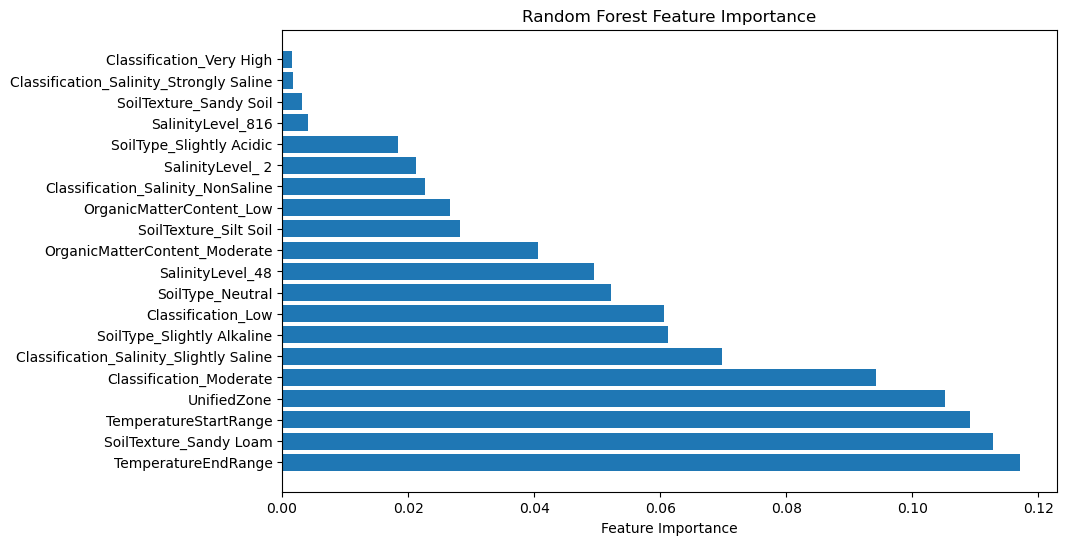

In [46]:
import matplotlib.pyplot as plt
import numpy as np

feature_importances = rf_model.feature_importances_

# Sort feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(feature_importances)), X_encoded.columns[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()


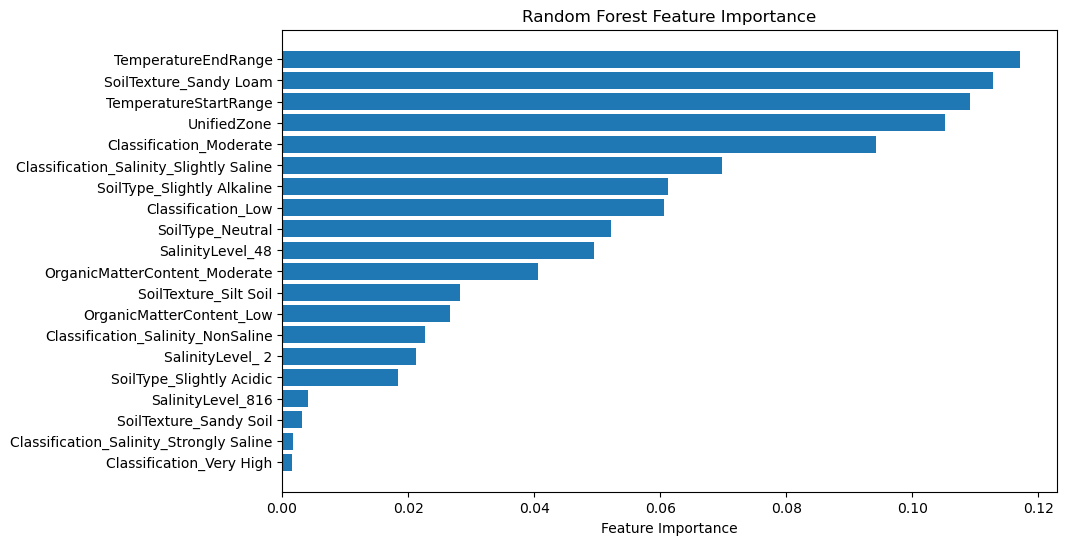

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `rf_model` is your trained Random Forest model
feature_importances = rf_model.feature_importances_

# Sort feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(feature_importances)), np.array(X_encoded.columns)[sorted_idx])
plt.gca().invert_yaxis()  # Invert y-axis to display top features at the top
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()


In [33]:
cleaned_df.PlantType.value_counts()

PlantType
Fruit          938
Grain          406
Vegetable      396
Nut            228
Herb           212
Root           206
Tubers         180
Legume         160
Mushroom        91
Leafy Green     52
Name: count, dtype: int64

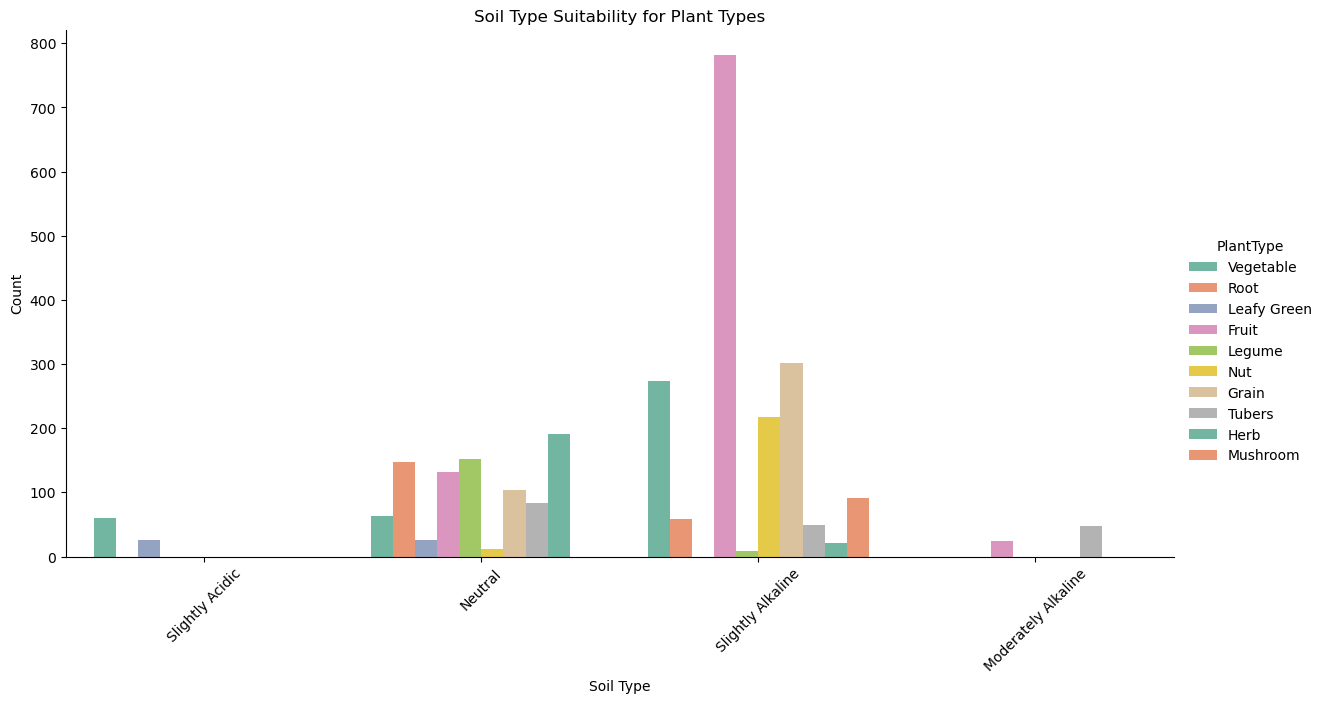

In [66]:
sns.catplot(
    data=cleaned_df, 
    x="SoilType", 
    hue="PlantType", 
    kind="count", 
    height=6, 
    aspect=2, 
    palette="Set2"
)
plt.title('Soil Type Suitability for Plant Types')
plt.ylabel('Count')
plt.xlabel('Soil Type')
plt.xticks(rotation=45)
plt.show()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


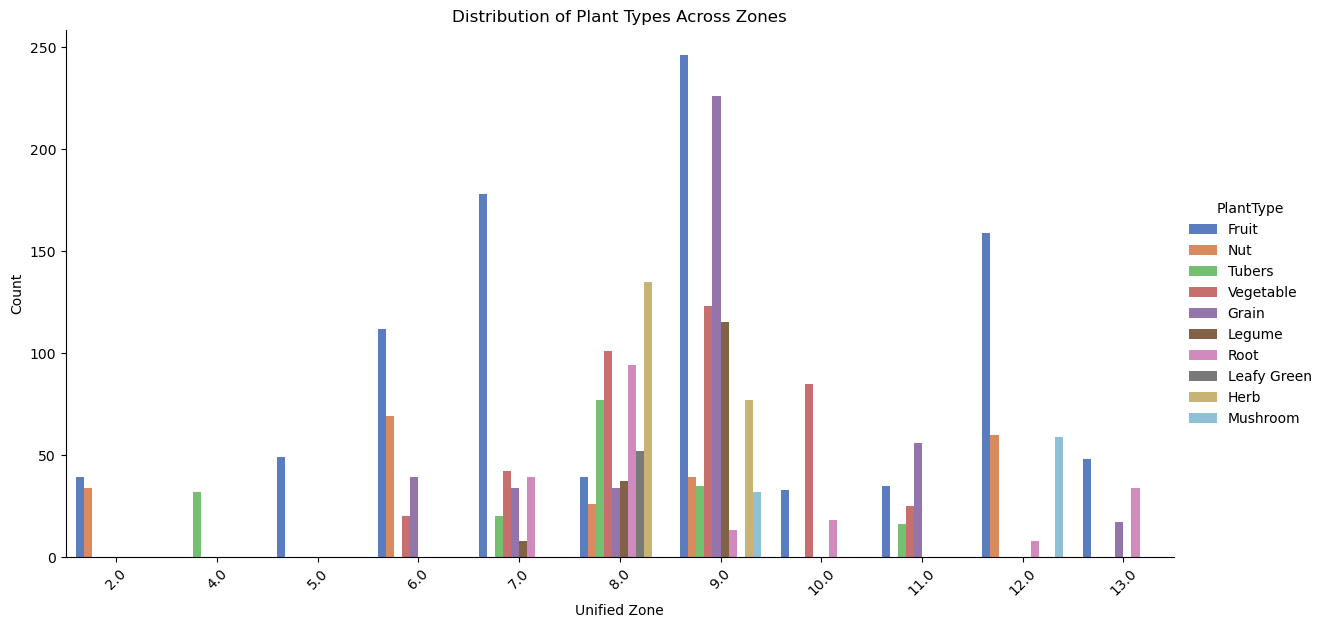

In [80]:
sns.catplot(
    x='UnifiedZone', 
    hue='PlantType', 
    kind='count', 
    data=cleaned_df, 
    height=6, 
    aspect=2, 
    palette='muted'
)
plt.title('Distribution of Plant Types Across Zones')
plt.ylabel('Count')
plt.xlabel('Unified Zone')
plt.xticks(rotation=45)
plt.show()